In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


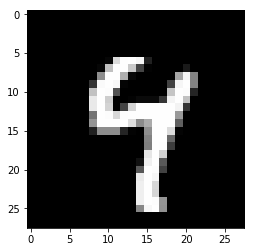

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

## Network Architecture

The encoder part of the network will be a typical convolutional pyramid. Each convolutional layer will be followed by a max-pooling layer to reduce the dimensions of the layers. The decoder though might be something new to you. The decoder needs to convert from a narrow representation to a wide reconstructed image. For example, the representation could be a 4x4x8 max-pool layer. This is the output of the encoder, but also the input to the decoder. We want to get a 28x28x1 image out from the decoder so we need to work our way back up from the narrow decoder input layer. A schematic of the network is shown below.

![Convolutional Autoencoder](assets/convolutional_autoencoder.png)


In [4]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

In [5]:
### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8

In [6]:
### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8

conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8

upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8

conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8

upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8

conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

In [7]:
# Training Parameters
learning_rate = 0.01
epochs = 20
batch_size = 256
display_step = 10

In [8]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
#loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [9]:
sess = tf.InteractiveSession()

In [10]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [11]:
sess.run(init)

In [12]:
# Training
vloss = []
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})
        vloss.append(batch_cost)
        if ii % display_step == 0 or ii == 1:
             print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6929
Epoch: 1/20... Training loss: 0.6116
Epoch: 1/20... Training loss: 0.3309
Epoch: 1/20... Training loss: 0.2366
Epoch: 1/20... Training loss: 0.2223
Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1700
Epoch: 1/20... Training loss: 0.1684
Epoch: 1/20... Training loss: 0.1621
Epoch: 1/20... Training loss: 0.1570
Epoch: 1/20... Training loss: 0.1615
Epoch: 1/20... Training loss: 0.1575
Epoch: 1/20... Training loss: 0.1562
Epoch: 1/20... Training loss: 0.1537
Epoch: 1/20... Training loss: 0.1497
Epoch: 1/20... Training loss: 0.1532
Epoch: 1/20... Training loss: 0.1459
Epoch: 1/20... Training loss: 0.1495
Epoch: 1/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1420
Epoch: 2/20... Training loss: 0.1427
Epoch: 2/20... Training loss: 0.1400
E

Epoch: 10/20... Training loss: 0.1008
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.1040
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.1011
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.1012
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.1010
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.1004
Epoch: 11/20... Training loss: 0.1022
Epoch: 11/20... Training loss: 0.1006
Epoch: 11/20... Training loss: 0.1004
Epoch: 11/20... Training loss: 0.1001
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.1022
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20

Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0988
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.1055
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0996
Epoch: 20/20... Training loss: 0.0979


In [13]:
ntest = 10

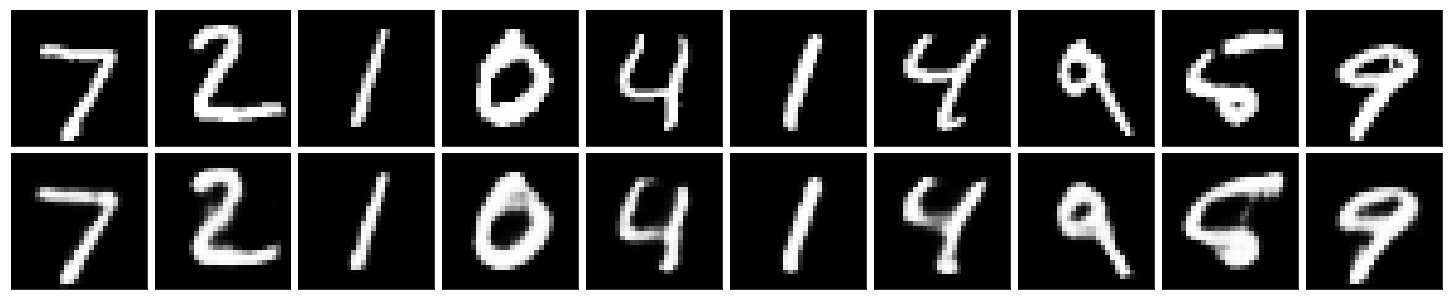

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=ntest, sharex=True, sharey=True, figsize=(ntest*2,4))
in_imgs = mnist.test.images[:ntest]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((ntest, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [15]:
idx=11
in_imgs = mnist.test.images[idx]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((1, 28, 28, 1))})

Text(0.5,1,'reconstructed #11')

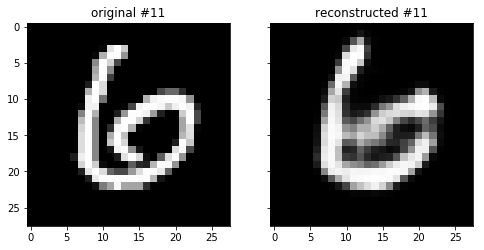

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,12))

axes[0].imshow(in_imgs.reshape((28, 28)), cmap='Greys_r')
axes[0].set_title('original #{}'.format(idx))

axes[1].imshow(reconstructed.reshape((28, 28)), cmap='Greys_r')
axes[1].set_title('reconstructed #{}'.format(idx))

In [17]:
#sess.close()

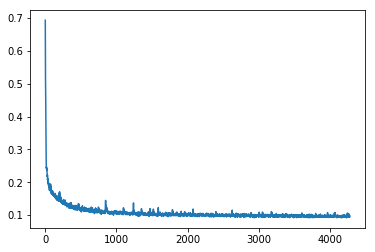

In [18]:
plt.figure()
plt.plot(vloss)